In [ ]:
# When using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
import shap
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('spotifydataset.csv')

# Line below is for Google Colab
#data = pd.read_csv('/content/drive/MyDrive/Labs/Team Project/dataset.csv')

print(data.head())
print(data.info())
print(data.describe())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


### Originally below trying to do all models and ensemble learning

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier,
    StackingClassifier,
    AdaBoostClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, mean_squared_error, 
    mean_absolute_error
)
from sklearn.feature_selection import RFE
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Tuple, Any
from tqdm import tqdm

Loading data...
Preparing data...

Analyzing feature correlations...


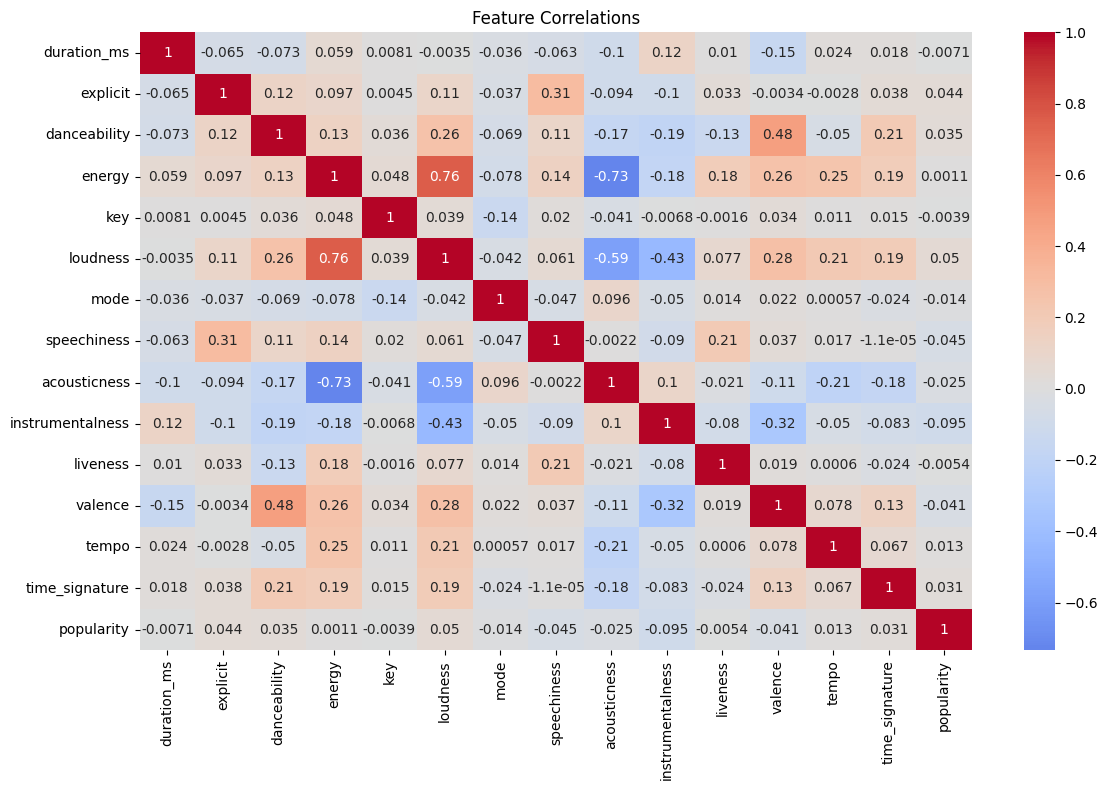


Performing RFE...

Top 5 features by RFE:
- duration_ms
- loudness
- acousticness
- valence
- tempo

Training and evaluating models...


  0%|          | 0/6 [00:00<?, ?it/s]C:\Users\mason\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mason\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 33%|███▎      | 2/6 [01:02<02:04, 31.04s/it]C:\Users\mason\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `


Model Results:

Linear Regression:
rmse: 21.963
mae: 18.336

Random Forest:
accuracy: 0.349
precision: 0.372
recall: 0.349
f1: 0.329

Decision Tree:
accuracy: 0.329
precision: 0.310
recall: 0.329
f1: 0.317

SVM:
accuracy: 0.148
precision: 0.138
recall: 0.148
f1: 0.050

AdaBoost:
accuracy: 0.141
precision: 0.020
recall: 0.141
f1: 0.035

Gradient Boosting:
accuracy: 0.011
precision: 0.013
recall: 0.011
f1: 0.005

Training stacking ensemble...


C:\Users\mason\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\mason\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:1426: RuntimeWarning: Number of classes in training fold (100) does not match total number of classes (101). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
C:\Users\mason\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\mason\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:1426: RuntimeWarning: Number of classes in training fold (100) does

In [ ]:
class SpotifyAnalyzer:
    def __init__(self, data_path: str):
        print("Loading data...")
        self.data = pd.read_csv(data_path)
        self.features = [
            "duration_ms", "explicit", "danceability", "energy", "key", "loudness",
            "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
            "valence", "tempo", "time_signature"
        ]
        self.target = "popularity"
        self.X = self.data[self.features]
        self.y = self.data[self.target]
        self.scaler = StandardScaler()

    def prepare_data(self) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """Prepare and split the data."""
        print("Preparing data...")
        X_scaled = self.scaler.fit_transform(self.X)
        return train_test_split(X_scaled, self.y, test_size=0.2, random_state=42)

    def analyze_correlations(self) -> None:
        """Analyze feature correlations."""
        print("\nAnalyzing feature correlations...")
        corr_matrix = self.X.copy()
        corr_matrix['popularity'] = self.y
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Correlations')
        plt.tight_layout()
        plt.show()

    def perform_rfe(self, X_train: np.ndarray, y_train: np.ndarray) -> None:
        """Perform Recursive Feature Elimination."""
        print("\nPerforming RFE...")
        estimator = RandomForestClassifier(random_state=42)  # Removed n_jobs
        selector = RFE(estimator, n_features_to_select=5, step=1)
        selector = selector.fit(X_train, y_train)
        
        print("\nTop 5 features by RFE:")
        for feature, selected in zip(self.features, selector.support_):
            if selected:
                print(f"- {feature}")

    def evaluate_model(self, y_true: np.ndarray, y_pred: np.ndarray, 
                      model_type: str = "classifier") -> Dict[str, float]:
        """Evaluate model performance."""
        if model_type == "classifier":
            return {
                'accuracy': accuracy_score(y_true, y_pred),
                'precision': precision_score(y_true, y_pred, average="weighted"),
                'recall': recall_score(y_true, y_pred, average="weighted"),
                'f1': f1_score(y_true, y_pred, average="weighted")
            }
        else:  # regression
            return {
                'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
                'mae': mean_absolute_error(y_true, y_pred)
            }

    def train_and_evaluate_models(self, X_train: np.ndarray, X_test: np.ndarray, 
                                y_train: np.ndarray, y_test: np.ndarray) -> Dict[str, Any]:
        """Train and evaluate all models."""
        print("\nTraining and evaluating models...")
        models = {
            'Linear Regression': (LinearRegression(), "regression"),
            'Random Forest': (RandomForestClassifier(random_state=42), "classifier"),
            'Decision Tree': (DecisionTreeClassifier(random_state=42), "classifier"),
            'SVM': (SVC(probability=True, random_state=42), "classifier"),
            'AdaBoost': (AdaBoostClassifier(random_state=42), "classifier"),
            'Gradient Boosting': (GradientBoostingClassifier(random_state=42), "classifier")
        }
        
        results = {}
        for name, (model, model_type) in tqdm(models.items()):
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            results[name] = self.evaluate_model(y_test, y_pred, model_type)
        
        return results

    def train_stacking_ensemble(self, X_train: np.ndarray, X_test: np.ndarray, 
                              y_train: np.ndarray, y_test: np.ndarray) -> Dict[str, float]:
        """Train and evaluate stacking ensemble."""
        print("\nTraining stacking ensemble...")
        estimators = [
            ('rf', RandomForestClassifier(random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42)),
            ('svm', SVC(probability=True, random_state=42))
        ]
        stack = StackingClassifier(
            estimators=estimators,
            final_estimator=GradientBoostingClassifier(random_state=42),
            n_jobs=None  # Changed from -1 to None
        )
        stack.fit(X_train, y_train)
        y_pred = stack.predict(X_test)
        return self.evaluate_model(y_test, y_pred)

    def perform_hyperparameter_tuning(self, X_train: np.ndarray, y_train: np.ndarray) -> None:
        """Perform hyperparameter tuning for Random Forest."""
        print("\nPerforming hyperparameter tuning...")
        param_grid = {
            'n_estimators': [50, 100],  # Reduced parameter space
            'max_depth': [10, 20],
            'min_samples_split': [2, 5]
        }
        
        grid_search = GridSearchCV(
            RandomForestClassifier(random_state=42),
            param_grid,
            cv=5,
            scoring='accuracy',
            n_jobs=None  # Changed from -1 to None
        )
        grid_search.fit(X_train, y_train)
        
        print("\nBest parameters:", grid_search.best_params_)
        print("Best cross-validation accuracy:", grid_search.best_score_)

    def run_analysis(self) -> None:
        """Run complete analysis pipeline."""
        # Prepare data
        X_train, X_test, y_train, y_test = self.prepare_data()
        
        # Analyze correlations
        self.analyze_correlations()
        
        # Perform RFE
        self.perform_rfe(X_train, y_train)
        
        # Train and evaluate individual models
        model_results = self.train_and_evaluate_models(X_train, X_test, y_train, y_test)
        print("\nModel Results:")
        for model, metrics in model_results.items():
            print(f"\n{model}:")
            for metric, value in metrics.items():
                print(f"{metric}: {value:.3f}")
        
        # Train and evaluate stacking ensemble
        stack_results = self.train_stacking_ensemble(X_train, X_test, y_train, y_test)
        print("\nStacking Ensemble Results:")
        for metric, value in stack_results.items():
            print(f"{metric}: {value:.3f}")
        
        # Perform hyperparameter tuning
        self.perform_hyperparameter_tuning(X_train, y_train)

if __name__ == "__main__":
    analyzer = SpotifyAnalyzer('spotifydataset.csv')
    analyzer.run_analysis()


## Getting a higher results than above, adding in Genre

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read and prepare data
df = pd.read_csv('spotifydataset.csv')

numerical_features = ['duration_ms', 'danceability', 'energy', 'key', 
                     'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                     'liveness', 'valence', 'tempo', 'time_signature']
categorical_features = ['track_genre']
X = df[numerical_features + categorical_features]
y = df['popularity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVM': SVR(),
    'Gradient Boost': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred_train = pipeline.predict(X_train)
    y_pred_val = pipeline.predict(X_val)
    y_pred_test = pipeline.predict(X_test)
    
    threshold = np.median(y)
    y_train_binary = (y_train > threshold).astype(int)
    y_val_binary = (y_val > threshold).astype(int)
    y_test_binary = (y_test > threshold).astype(int)
    y_pred_train_binary = (y_pred_train > threshold).astype(int)
    y_pred_val_binary = (y_pred_val > threshold).astype(int)
    y_pred_test_binary = (y_pred_test > threshold).astype(int)
    
    results[name] = {
        'train': {
            'accuracy': accuracy_score(y_train_binary, y_pred_train_binary),
            'precision': precision_score(y_train_binary, y_pred_train_binary),
            'recall': recall_score(y_train_binary, y_pred_train_binary),
            'f1': f1_score(y_train_binary, y_pred_train_binary)
        },
        'val': {
            'accuracy': accuracy_score(y_val_binary, y_pred_val_binary),
            'precision': precision_score(y_val_binary, y_pred_val_binary),
            'recall': recall_score(y_val_binary, y_pred_val_binary),
            'f1': f1_score(y_val_binary, y_pred_val_binary)
        },
        'test': {
            'accuracy': accuracy_score(y_test_binary, y_pred_test_binary),
            'precision': precision_score(y_test_binary, y_pred_test_binary),
            'recall': recall_score(y_test_binary, y_pred_test_binary),
            'f1': f1_score(y_test_binary, y_pred_test_binary)
        }
    }

for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for dataset, scores in metrics.items():
        print(f"\n{dataset.capitalize()} Set:")
        for metric, value in scores.items():
            print(f"{metric}: {value:.3f}")


Linear Regression:

Train Set:
accuracy: 0.741
precision: 0.732
recall: 0.741
f1: 0.736

Val Set:
accuracy: 0.740
precision: 0.731
recall: 0.736
f1: 0.734

Test Set:
accuracy: 0.739
precision: 0.728
recall: 0.735
f1: 0.732

Decision Tree:

Train Set:
accuracy: 0.994
precision: 0.997
recall: 0.992
f1: 0.994

Val Set:
accuracy: 0.742
precision: 0.740
recall: 0.724
f1: 0.732

Test Set:
accuracy: 0.737
precision: 0.731
recall: 0.722
f1: 0.727

Random Forest:

Train Set:
accuracy: 0.959
precision: 0.948
recall: 0.969
f1: 0.958

Val Set:
accuracy: 0.800
precision: 0.773
recall: 0.833
f1: 0.802

Test Set:
accuracy: 0.798
precision: 0.769
recall: 0.833
f1: 0.800

SVM:

Train Set:
accuracy: 0.759
precision: 0.771
recall: 0.719
f1: 0.744

Val Set:
accuracy: 0.755
precision: 0.767
recall: 0.715
f1: 0.740

Test Set:
accuracy: 0.750
precision: 0.759
recall: 0.710
f1: 0.734

Gradient Boost:

Train Set:
accuracy: 0.681
precision: 0.736
recall: 0.540
f1: 0.623

Val Set:
accuracy: 0.678
precision: 0.7